In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot


In [3]:
data = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [4]:
df = data.copy()

In [7]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [25]:
df.shape

(2443651, 9)

In [8]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

In [9]:
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [10]:
sorted_crosstab = crosstab.sort_values(by=True, ascending=False)

In [12]:
sorted_crosstab.head(20)

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
Beauty,19010,302
Pet Supplies,9152,285
Arts & Crafts,9319,230
Women,17559,213


In [14]:
sorted_crosstab['best_ratio'] = sorted_crosstab[True] / (sorted_crosstab[False] + sorted_crosstab[True])

In [15]:
sorted_crosstab

isBestSeller,False,True,best_ratio
category,,,
Grocery,9008,556,0.058135
Health & Personal Care,9017,552,0.057686
Baby,14709,341,0.022658
Sports & Outdoors,835935,330,0.000395
Power & Hand Tools,8353,306,0.035339
...,...,...,...
Downhill Ski Boots,1284,0,0.000000
Digital Frames,774,0,0.000000
Motorbike Chassis,107,0,0.000000


In [16]:
sorted_crosstab.sort_values(by=True, ascending=False)

isBestSeller,False,True,best_ratio
category,,,
Grocery,9008,556,0.058135
Health & Personal Care,9017,552,0.057686
Baby,14709,341,0.022658
Sports & Outdoors,835935,330,0.000395
Power & Hand Tools,8353,306,0.035339
...,...,...,...
Vases,250,0,0.000000
Blank Media Cases & Wallets,243,0,0.000000
Bedding Collections,6309,0,0.000000


There are some categories, where bestesellers are more prevelant, like Grocery, Health and Baby.

In [19]:
chi2, p, dof, expected = chi2_contingency(crosstab)

# Anzeigen der Ergebnisse des Chi-Quadrat-Tests
print("Chi2 Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)

Chi2 Statistic: 36540.20270061387
P-Value: 0.0
Degrees of Freedom: 295


Best Seller and Category are not independent.

In [20]:
n = crosstab.sum().sum()  
min_dim = min(crosstab.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))
print("Cramér's V:", cramers_v)

Cramér's V: 0.1222829439760564


Weak association between category and Best Seller status.

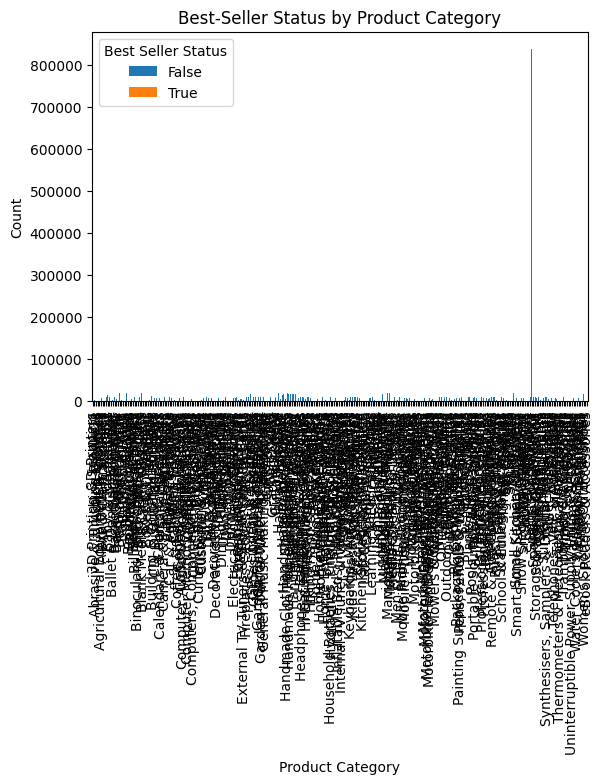

In [21]:
crosstab.plot(kind='bar', stacked=True)
plt.title('Best-Seller Status by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(title='Best Seller Status')
plt.show()

In [23]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Bestimmen der unteren und oberen Grenzen für Ausreißer
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtern der Produkte, die keine Ausreißer sind
filtered_df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
filtered_df.shape

(2115963, 9)

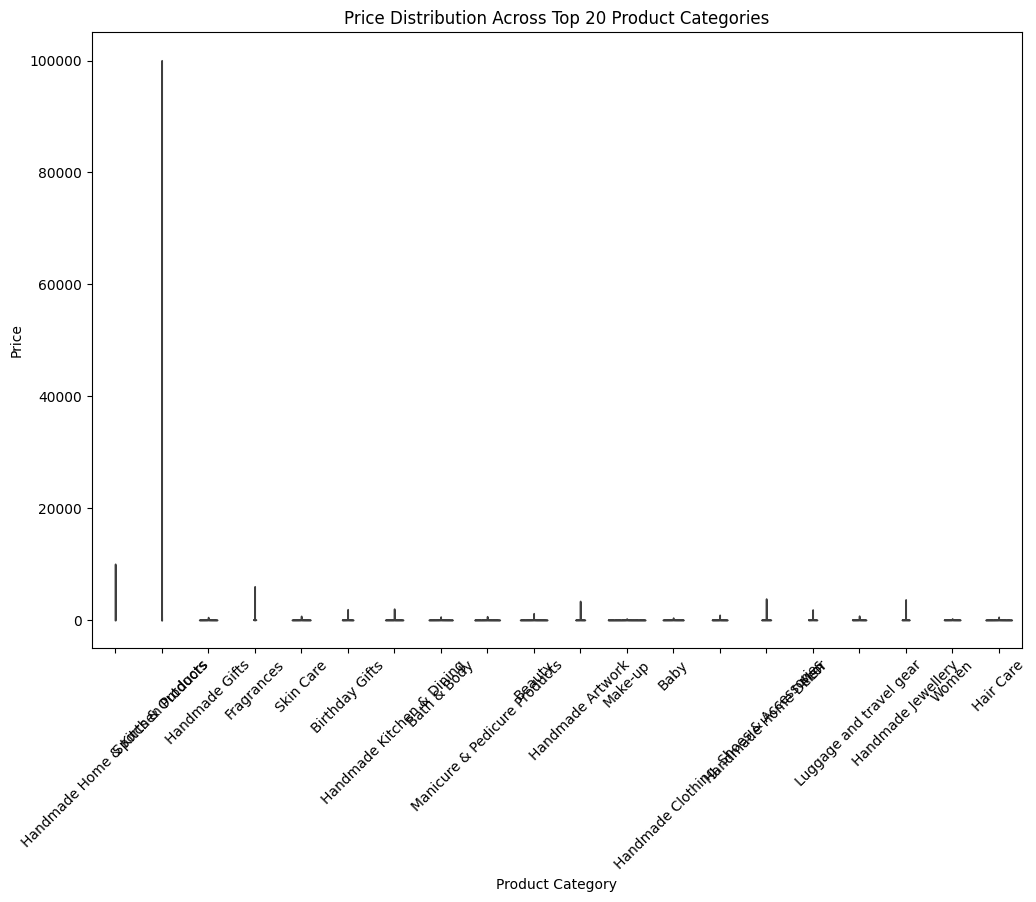

In [28]:
top_categories = df['category'].value_counts().head(20).index
filtered_df = df[df['category'].isin(top_categories)]


plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=filtered_df, inner='quartile')
plt.title('Price Distribution Across Top 20 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [29]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Bestimmen der unteren und oberen Grenzen für Ausreißer
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtern der Produkte, die keine Ausreißer sind
filtered_df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [30]:
median_prices = filtered_df.groupby('category')['price'].median().sort_values(ascending=False)

# Identify the category with the highest median price
highest_median_category = median_prices.idxmax()
highest_median_category

'Desktop PCs'

In [32]:
average_prices = filtered_df.groupby('category')['price'].mean().sort_values(ascending=False)

# Filter and select the top 10 product categories based on count
top_categories = average_prices.head(1)
top_categories

category
Motherboards    68.772432
Name: price, dtype: float64

/var/folders/nt/x7knb0nj29bbk77zhhv8mz8c0000gn/T/ipykernel_31936/2559791768.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[df['category'].isin(top_categories)]


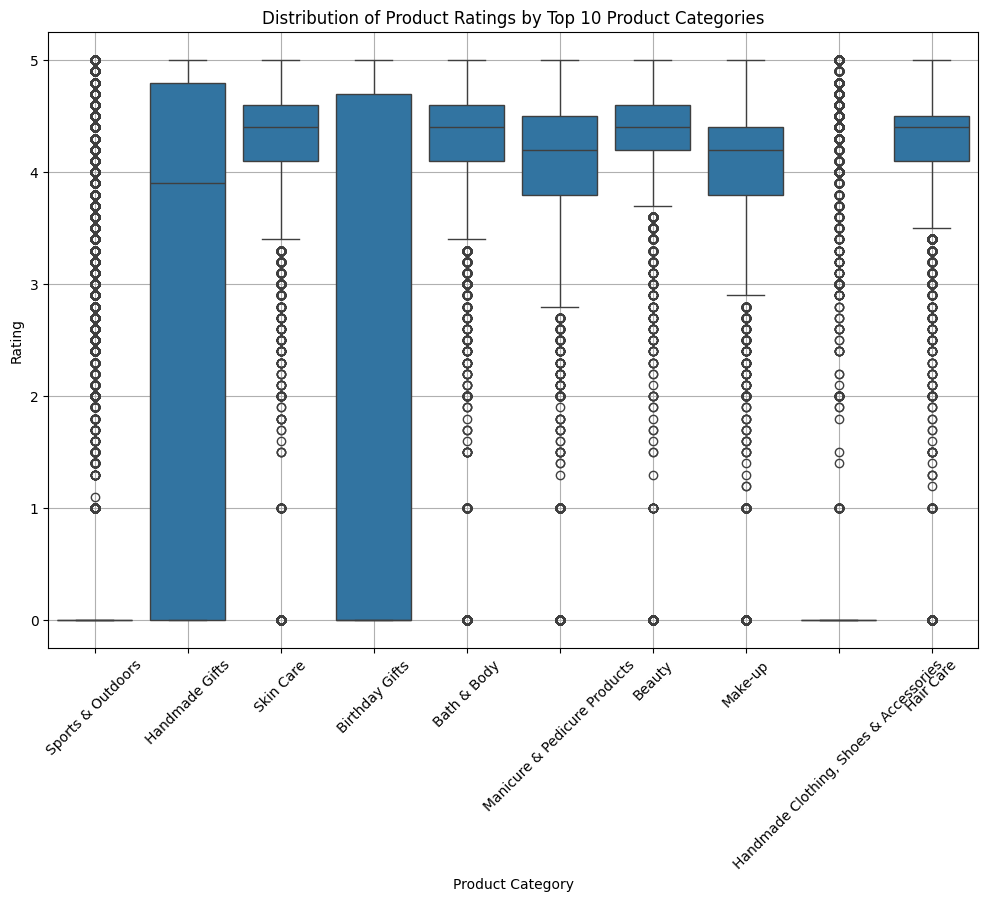

In [34]:
top_categories = filtered_df['category'].value_counts().head(10).index
filtered_df = filtered_df[df['category'].isin(top_categories)]

# Create side-by-side box plots
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=filtered_df)
plt.title('Distribution of Product Ratings by Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [37]:
median_ratings = filtered_df.groupby('category')['stars'].median().sort_values(ascending=False)
highest_median_category = median_ratings.idxmax()
highest_median_category

'Bath & Body'

In [38]:
correlation_coefficient = filtered_df['price'].corr(filtered_df['stars'])
correlation_coefficient

-0.010715101854047

There is no significant correlation.

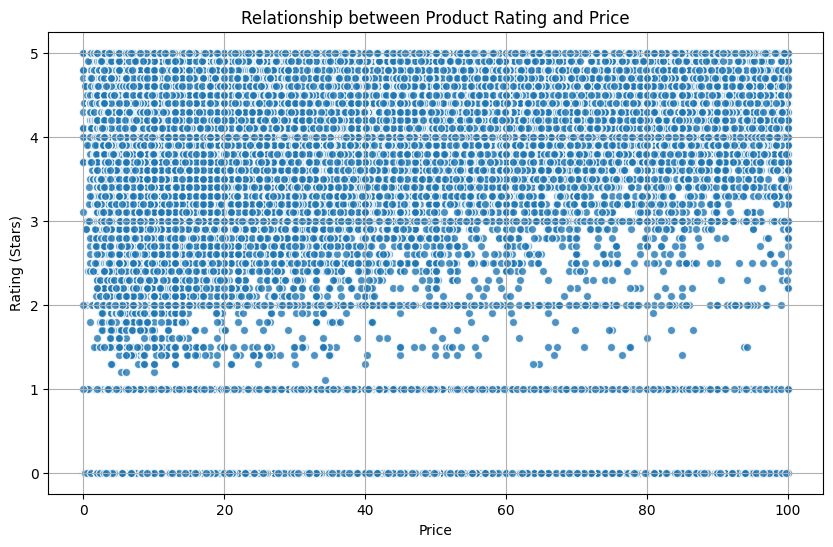

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['price'], filtered_df['stars'], alpha=0.8, edgecolors='w')
plt.title('Relationship between Product Rating and Price')
plt.xlabel('Price')
plt.ylabel('Rating (Stars)')
plt.grid(True)
plt.show()

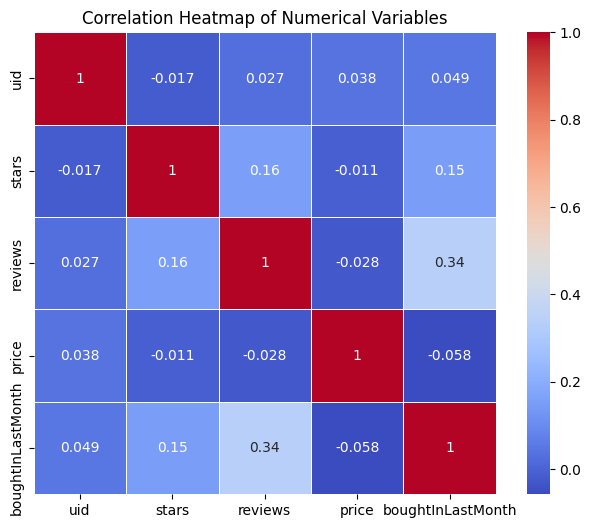

In [42]:
numeric_columns = filtered_df.select_dtypes(include=[np.number]).columns
numeric_df = filtered_df[numeric_columns]
corr_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

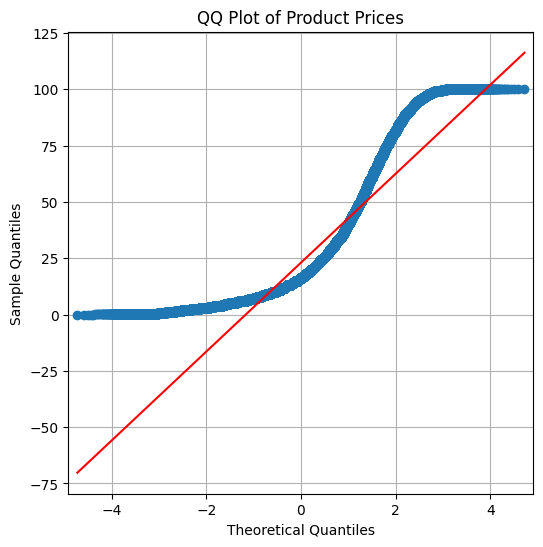

In [46]:
fig, ax = plt.subplots(figsize=(6, 6))
qqplot(filtered_df['price'], line='s', ax=ax)  # 's' indicates a standardized line

# Customize plot
ax.set_title('QQ Plot of Product Prices')
ax.grid(True)
plt.show()